In [1]:
from system import *
from math import floor
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as color

plt.rcParams.update({'font.size': 18})

e_field = zero_field()
b_field = t89(1)
system  = System(e_field, b_field)

Load IGRF coefficients ...


In [17]:
system.populate_by_eq_pa(5000,
                         delta(12),
                         delta(1e6),
                         delta(np.radians(5)),
                         uniform(0, 2*np.pi)
                        )

100%|██████████| 5000/5000 [00:22<00:00, 223.10it/s]


In [18]:
system.solve(0.6, 1e-4)

100%|██████████| 5000/5000 [05:46<00:00, 14.43it/s]


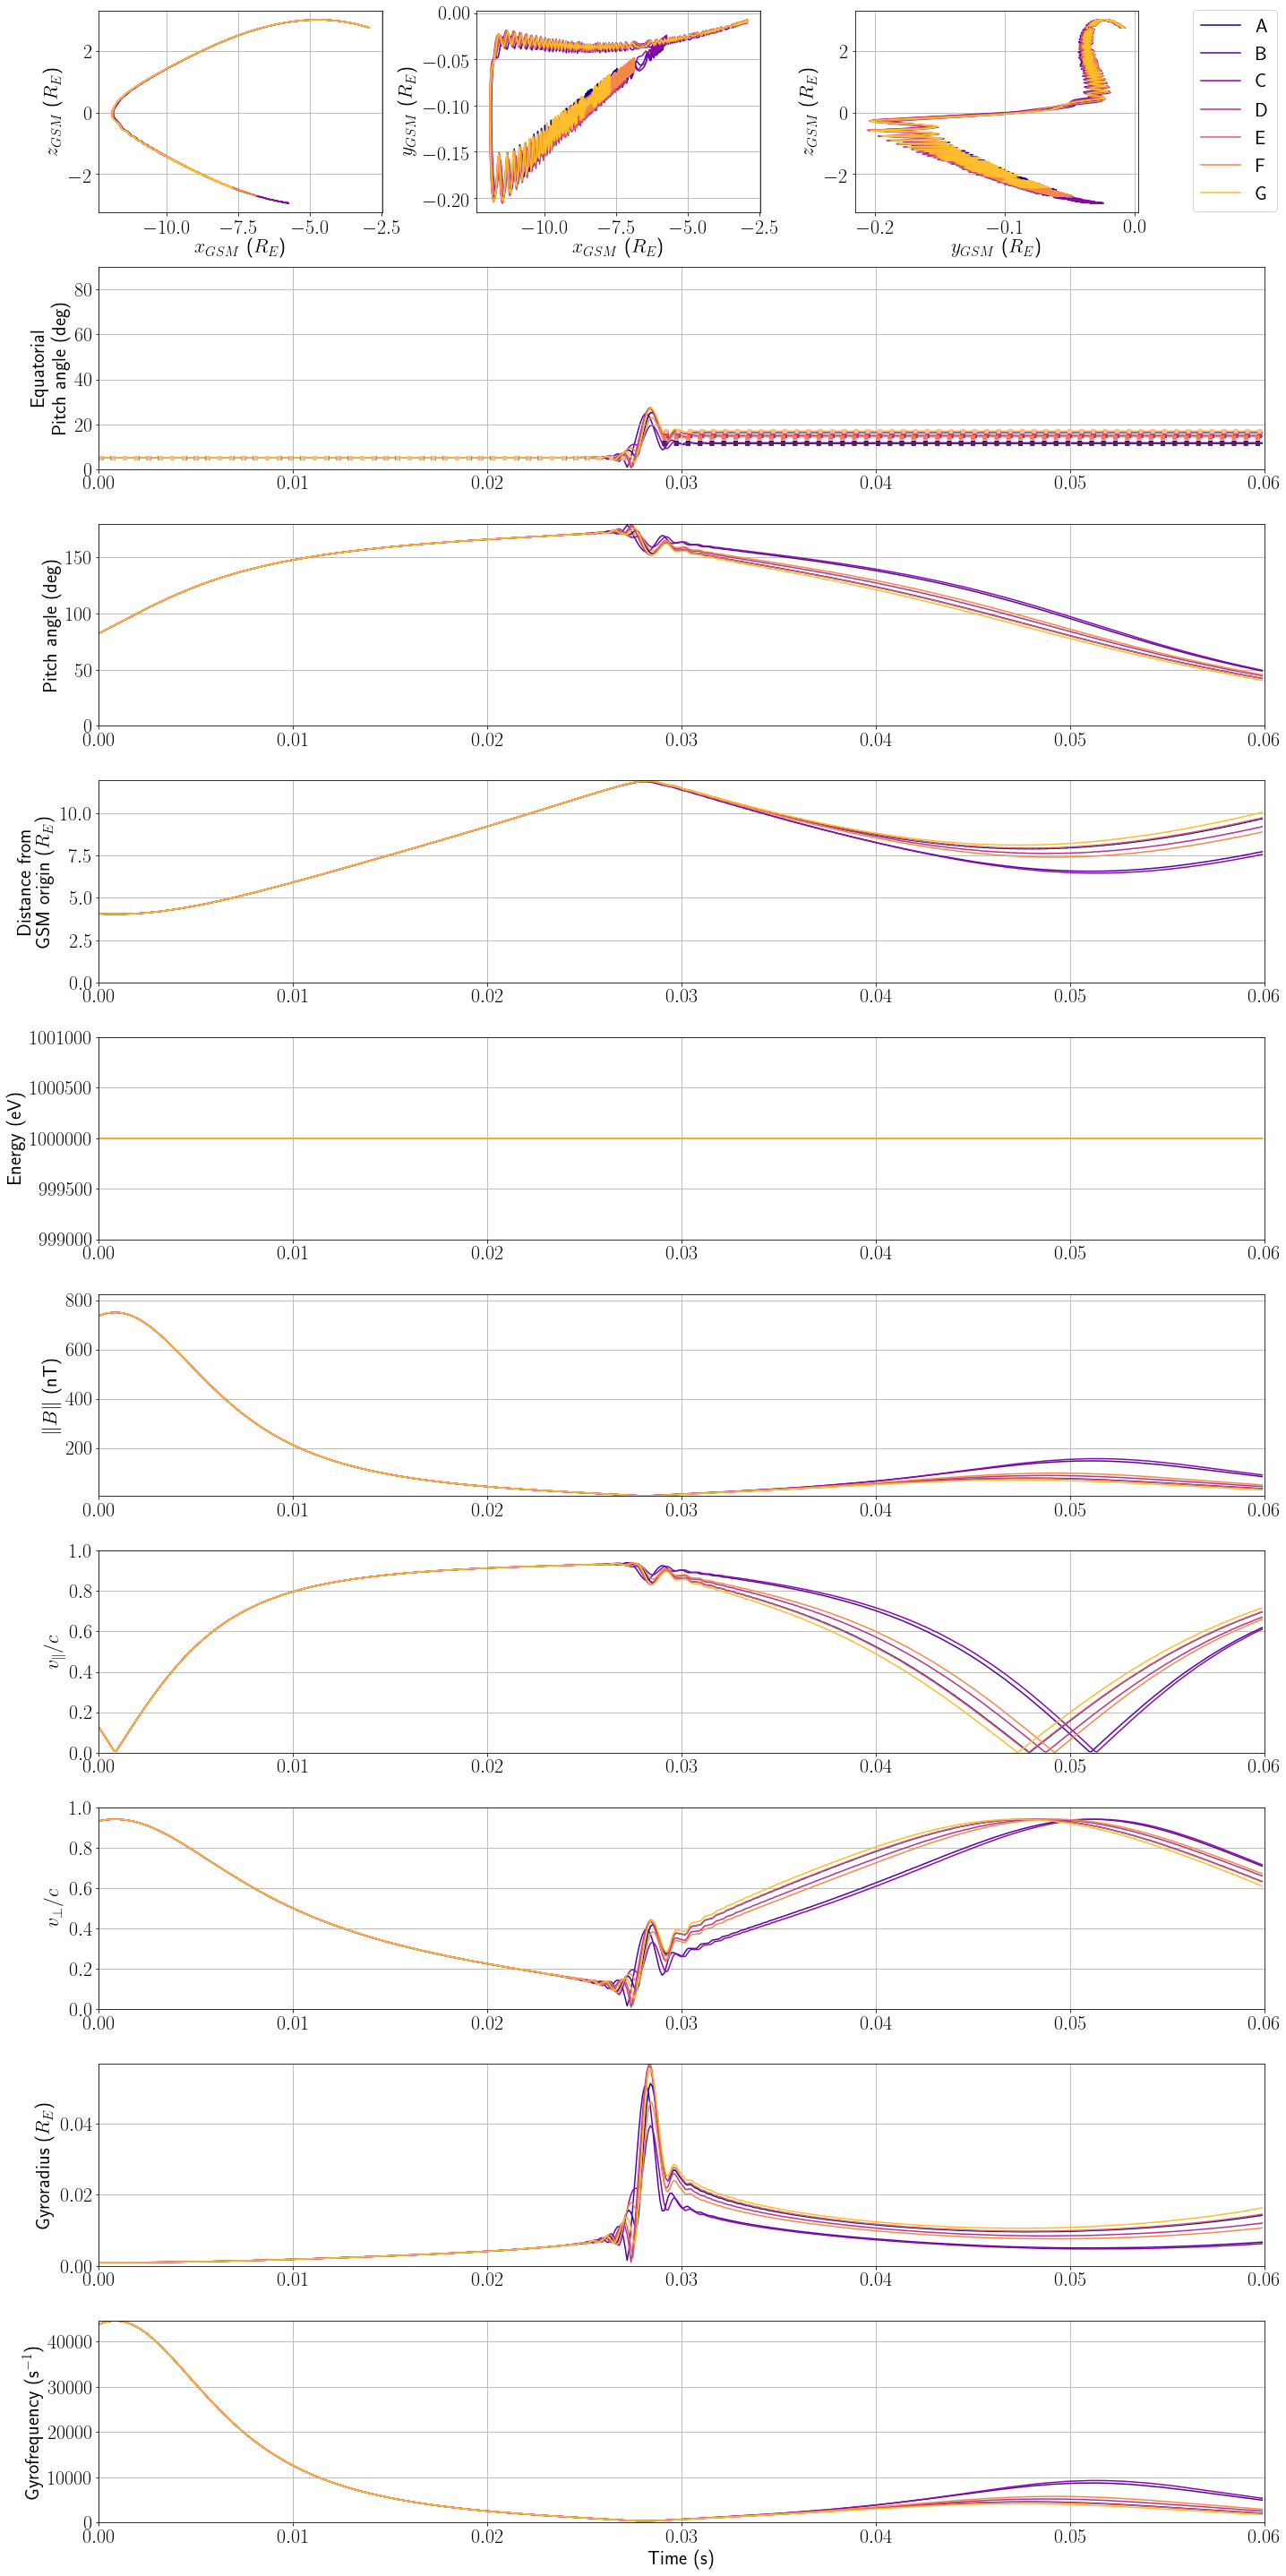

In [27]:
system.plot([523, 980, 135, 13, 27, 559, 332])

In [19]:
eq_pas = eq_pitch_angle_from_moment(system.history, system.ics[:, 4, 0:2])

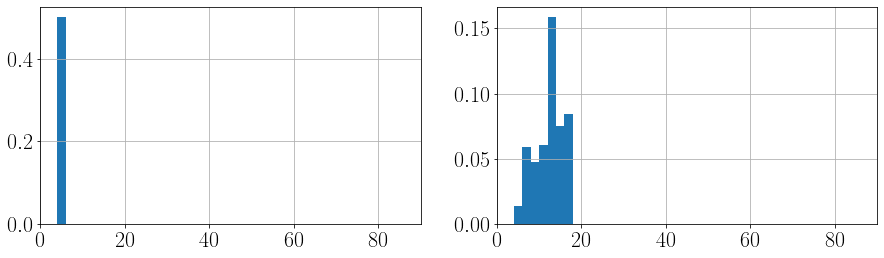

In [26]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.hist(eq_pas[:, 0], density=True, bins=np.arange(0, 90, 2))
plt.xlim([0, 90])
plt.grid()

plt.subplot(122)
plt.hist(eq_pas[:, -1], density=True, bins=np.arange(0, 90, 2))
plt.xlim([0, 90])
plt.grid()